In [348]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [349]:
df = pd.read_csv('cs-training.csv')

In [350]:
df.head()

,ID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [351]:
df.isnull().sum()

ID                                          0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [352]:
df = df.drop(df.columns[[0,4,8,10]],axis=1)

In [353]:
df['SeriousDlqin2yrs'].value_counts(normalize=True)

0    0.93316
1    0.06684
Name: SeriousDlqin2yrs, dtype: float64

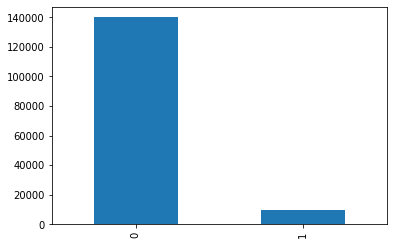

In [354]:
df['SeriousDlqin2yrs'].value_counts().plot.bar()

# Monthly income

In [355]:
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents
0,1,0.766127,45,0.802982,9120.0,13,6,2.0
1,0,0.957151,40,0.121876,2600.0,4,0,1.0
2,0,0.658180,38,0.085113,3042.0,2,0,0.0
3,0,0.233810,30,0.036050,3300.0,5,0,0.0
4,0,0.907239,49,0.024926,63588.0,7,1,0.0


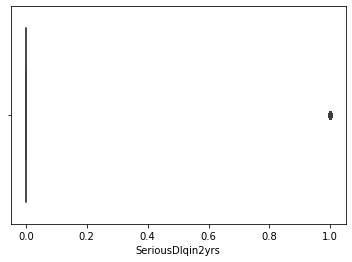

SeriousDlqin2yrs


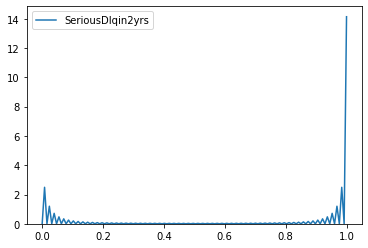

SeriousDlqin2yrs


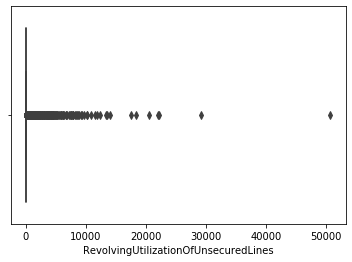

RevolvingUtilizationOfUnsecuredLines


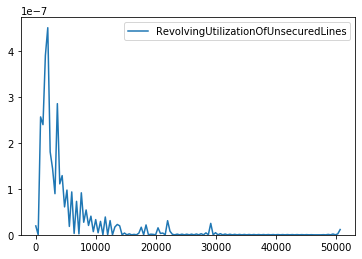

RevolvingUtilizationOfUnsecuredLines


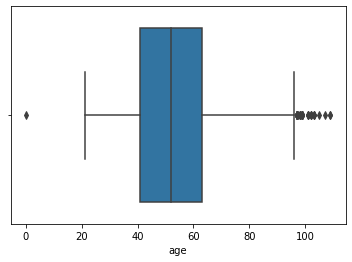

age


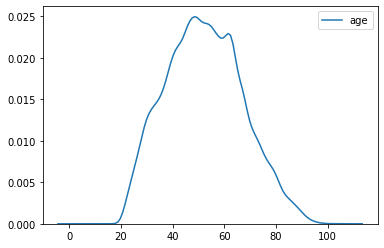

age


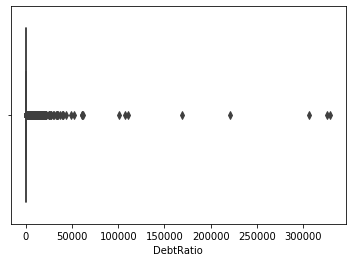

DebtRatio


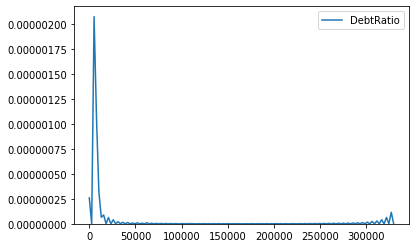

DebtRatio


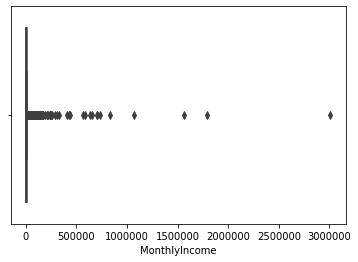

MonthlyIncome


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


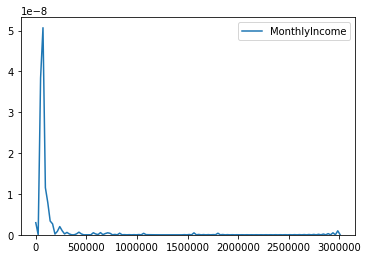

MonthlyIncome


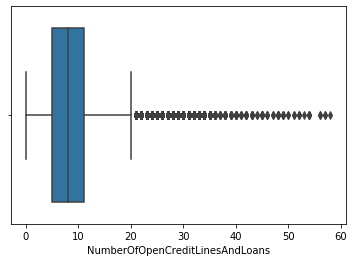

NumberOfOpenCreditLinesAndLoans


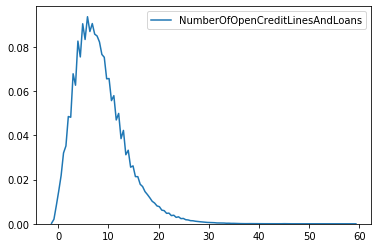

NumberOfOpenCreditLinesAndLoans


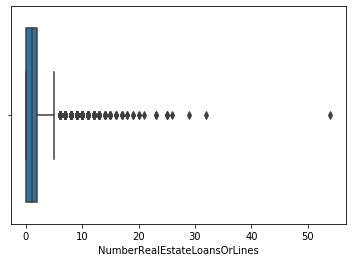

NumberRealEstateLoansOrLines


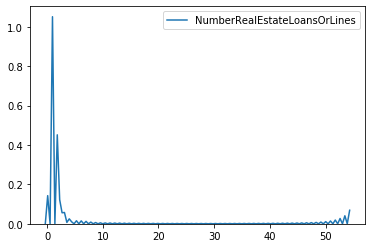

NumberRealEstateLoansOrLines


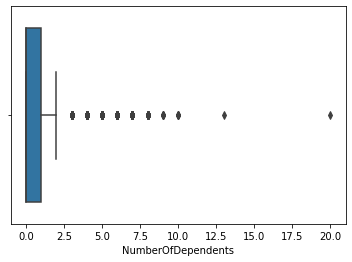

NumberOfDependents


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


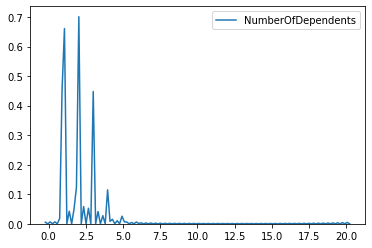

NumberOfDependents


In [356]:
for i in df.columns:
    sns.boxplot(df[i])
    plt.show()
    print(i)
    sns.kdeplot(df[i])
    plt.show()
    print(i)

In [357]:
#Capping outliers for monthly income:

df['MonthlyIncome'].describe()

count    1.202690e+05
mean     6.670221e+03
std      1.438467e+04
min      0.000000e+00
25%      3.400000e+03
50%      5.400000e+03
75%      8.249000e+03
max      3.008750e+06
Name: MonthlyIncome, dtype: float64

In [358]:
df.loc[df['MonthlyIncome']>15500,'MonthlyIncome'] = 15500

#For handling outliers at max level, we have capped outliers at q3+1.5iqr

In [359]:
df.loc[df['MonthlyIncome']<1000,'MonthlyIncome'] = np.nan

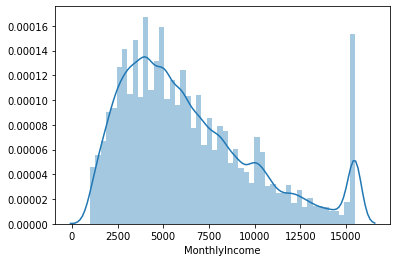

In [360]:
sns.distplot(df['MonthlyIncome'].dropna())

In [361]:
df['MonthlyIncome'].fillna(df['MonthlyIncome'].mean())

0          9120.000000
1          2600.000000
2          3042.000000
3          3300.000000
4         15500.000000
              ...     
149995     2100.000000
149996     5584.000000
149997     6379.571464
149998     5716.000000
149999     8158.000000
Name: MonthlyIncome, Length: 150000, dtype: float64

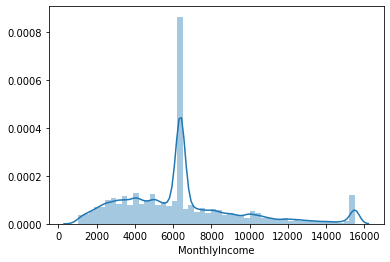

In [362]:
sns.distplot(df['MonthlyIncome'].fillna(df['MonthlyIncome'].mean()))

In [363]:
##Not the correct approach

In [364]:
df['MonthlyIncome'].fillna(method='ffill',inplace=True)

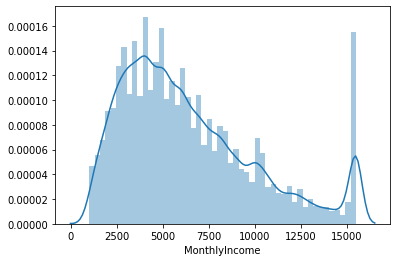

In [365]:
sns.distplot(df['MonthlyIncome'])

In [366]:
#Maintains distribution

In [367]:
df['RevolvingUtilizationOfUnsecuredLines'].describe()  ##monthly limit of credit(what proportion is being used)

count    150000.000000
mean          6.048438
std         249.755371
min           0.000000
25%           0.029867
50%           0.154181
75%           0.559046
max       50708.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

In [368]:
df.loc[df['RevolvingUtilizationOfUnsecuredLines']>1,'RevolvingUtilizationOfUnsecuredLines'] = np.nan

In [369]:
df['RevolvingUtilizationOfUnsecuredLines'].fillna(method='ffill',inplace=True)

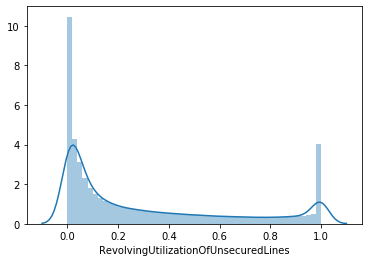

In [370]:
sns.distplot(df['RevolvingUtilizationOfUnsecuredLines'])

In [371]:
df['age'].describe()

count    150000.000000
mean         52.295207
std          14.771866
min           0.000000
25%          41.000000
50%          52.000000
75%          63.000000
max         109.000000
Name: age, dtype: float64

In [372]:
df.loc[((df['age']>80)|(df['age']<18)),'age'] = np.nan

In [373]:
df['age'].isna().sum()

4937

In [374]:
df['age'].fillna(method='ffill',inplace=True)

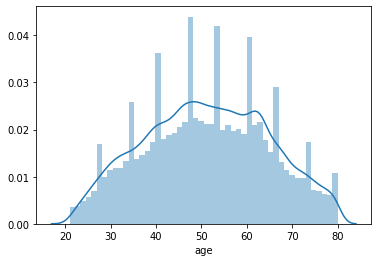

In [375]:
sns.distplot(df['age'])

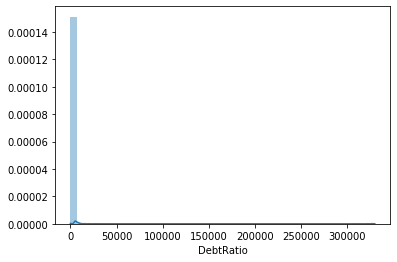

In [376]:
sns.distplot(df['DebtRatio'])

In [377]:
df.loc[df['DebtRatio']>1,'DebtRatio'] = np.nan

In [378]:
df['DebtRatio'].fillna(method='ffill',inplace=True)

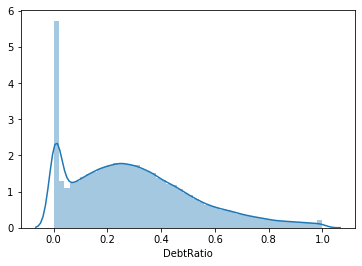

In [379]:
sns.distplot(df['DebtRatio'])

In [380]:
df['NumberOfDependents'].describe()

count    146076.000000
mean          0.757222
std           1.115086
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          20.000000
Name: NumberOfDependents, dtype: float64

In [381]:
df['NumberOfDependents'].isna().sum()

3924

In [382]:
df['NumberOfDependents'].fillna(method='ffill',inplace=True)

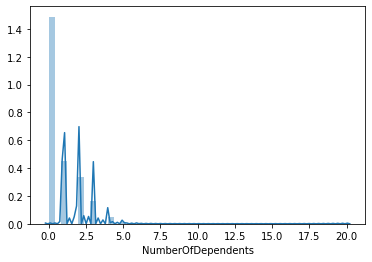

In [383]:
sns.distplot(df['NumberOfDependents'])

In [384]:
df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,0.066840,0.303669,51.170047,0.303109,6376.857593,8.452760,1.018240,0.757247
std,0.249746,0.337852,13.667271,0.226290,3642.648085,5.145951,1.129771,1.115278
min,0.000000,0.000000,21.000000,0.000000,1000.000000,0.000000,0.000000,0.000000
25%,0.000000,0.028578,41.000000,0.126122,3600.000000,5.000000,0.000000,0.000000
50%,0.000000,0.144257,51.000000,0.274252,5500.000000,8.000000,1.000000,0.000000
75%,0.000000,0.520104,62.000000,0.438325,8333.000000,11.000000,2.000000,1.000000
max,1.000000,1.000000,80.000000,1.000000,15500.000000,58.000000,54.000000,20.000000


# Exploratory Data Analysis

In [385]:
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents
0,1,0.766127,45.0,0.802982,9120.0,13,6,2.0
1,0,0.957151,40.0,0.121876,2600.0,4,0,1.0
2,0,0.658180,38.0,0.085113,3042.0,2,0,0.0
3,0,0.233810,30.0,0.036050,3300.0,5,0,0.0
4,0,0.907239,49.0,0.024926,15500.0,7,1,0.0


# Target:SeriousDlqin2yrs
Connect Target with all independant variables

In [386]:
df.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans',
       'NumberRealEstateLoansOrLines', 'NumberOfDependents'],
      dtype='object')

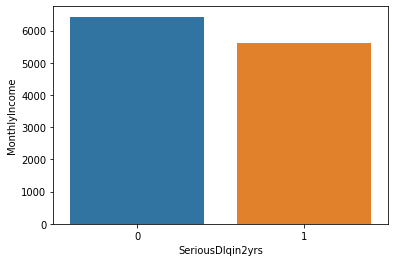

In [387]:
sns.barplot(data=df,x='SeriousDlqin2yrs',y='MonthlyIncome',ci=0)

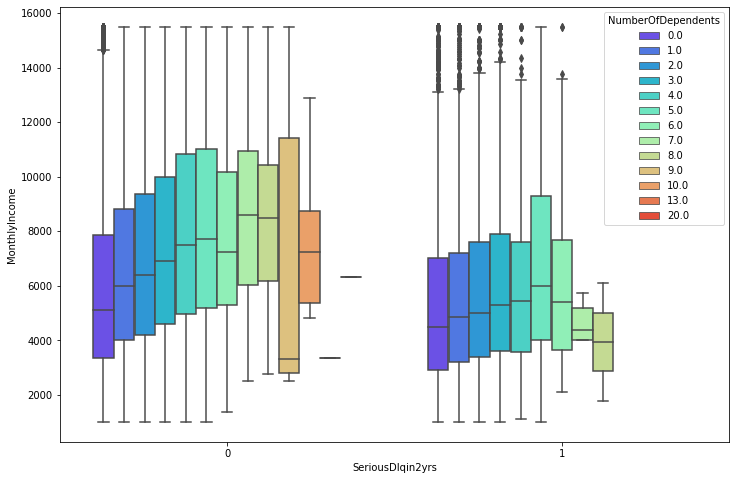

In [388]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df,x='SeriousDlqin2yrs',y='MonthlyIncome',hue='NumberOfDependents',palette='rainbow')

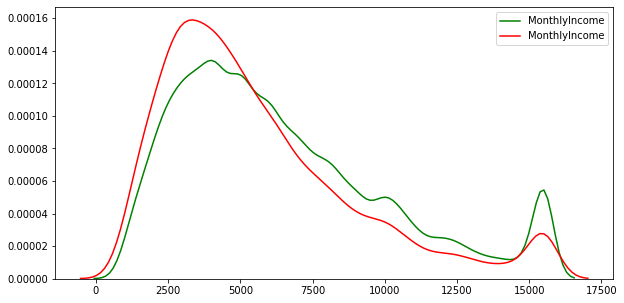

In [389]:
mi0 = df[df['SeriousDlqin2yrs']==0]
mi1 = df[df['SeriousDlqin2yrs']==1]

plt.figure(figsize=(10,5))
sns.kdeplot(mi0['MonthlyIncome'],color='g')
sns.kdeplot(mi1['MonthlyIncome'],color='r')
plt.show()

In [390]:
q1 = df['MonthlyIncome'].quantile(0.25)
q2 = df['MonthlyIncome'].quantile(0.50)
q3 = df['MonthlyIncome'].quantile(0.75)

def mi_cat(mi):
    if mi<=q1:
        return 1
    elif q1<mi<=q2:
        return 2
    elif q2<mi<=q3:
        return 3
    else:
        return 4
    


In [391]:
df['mi_cat'] = df['MonthlyIncome'].apply(mi_cat)

In [392]:
df['mi_cat'].value_counts(normalize=True)

1    0.254053
3    0.250180
4    0.249733
2    0.246033
Name: mi_cat, dtype: float64

In [393]:
df.groupby('mi_cat')['MonthlyIncome'].agg(['min','max'])

,min,max
mi_cat,,
1,1000.0,3600.0
2,3601.0,5500.0
3,5501.0,8333.0
4,8334.0,15500.0


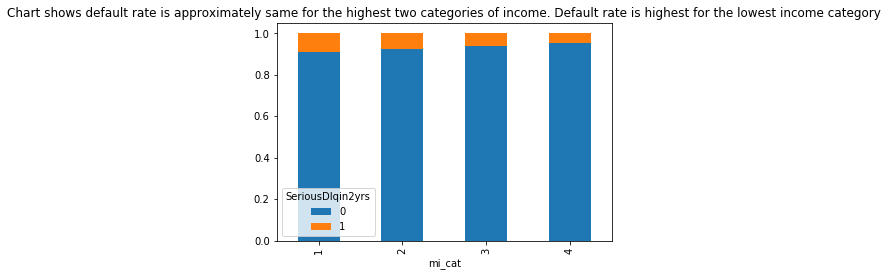

In [394]:
pd.crosstab(df['mi_cat'],df['SeriousDlqin2yrs'],normalize=0).plot.bar(stacked=True)
plt.title('Chart shows default rate is approximately same for the highest two categories of income. Default rate is highest for the lowest income category')
plt.show()

In [395]:
df.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans',
       'NumberRealEstateLoansOrLines', 'NumberOfDependents', 'mi_cat'],
      dtype='object')

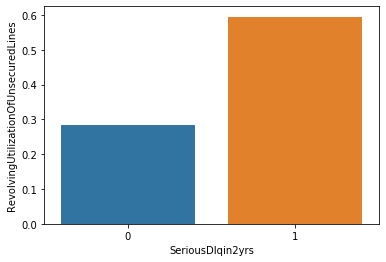

In [396]:
sns.barplot(data=df,x='SeriousDlqin2yrs',y='RevolvingUtilizationOfUnsecuredLines',ci=0)

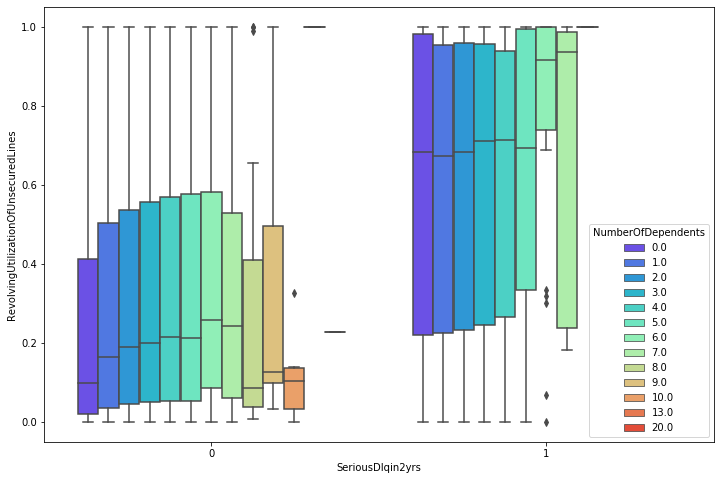

In [397]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df,x='SeriousDlqin2yrs',y='RevolvingUtilizationOfUnsecuredLines',hue='NumberOfDependents',palette='rainbow')

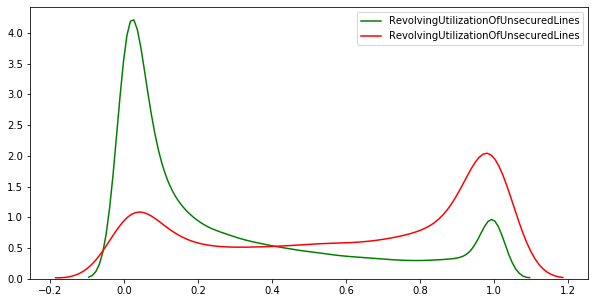

In [398]:
mi0 = df[df['SeriousDlqin2yrs']==0]
mi1 = df[df['SeriousDlqin2yrs']==1]

plt.figure(figsize=(10,5))
sns.kdeplot(mi0['RevolvingUtilizationOfUnsecuredLines'],color='g')
sns.kdeplot(mi1['RevolvingUtilizationOfUnsecuredLines'],color='r')
plt.show()

In [399]:
q1 = df['RevolvingUtilizationOfUnsecuredLines'].quantile(0.25)
q2 = df['RevolvingUtilizationOfUnsecuredLines'].quantile(0.50)
q3 = df['RevolvingUtilizationOfUnsecuredLines'].quantile(0.75)

def ruul_cat(mi):
    if mi<=q1:
        return 1
    elif q1<mi<=q2:
        return 2
    elif q2<mi<=q3:
        return 3
    else:
        return 4
    


In [400]:
df['ruul_cat'] = df['RevolvingUtilizationOfUnsecuredLines'].apply(ruul_cat)

In [401]:
df['ruul_cat'].value_counts(normalize=True)

4    0.25
3    0.25
2    0.25
1    0.25
Name: ruul_cat, dtype: float64

In [402]:
df.groupby('ruul_cat')['RevolvingUtilizationOfUnsecuredLines'].agg(['min','max'])

,min,max
ruul_cat,,
1,0.000000,0.028576
2,0.028579,0.144257
3,0.144257,0.520099
4,0.520122,1.000000


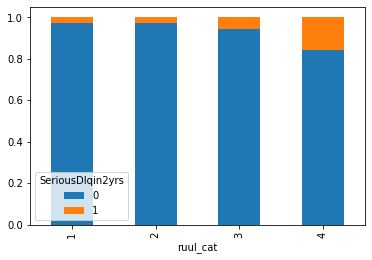

In [403]:
pd.crosstab(df['ruul_cat'],df['SeriousDlqin2yrs'],normalize=0).plot.bar(stacked=True)
plt.show()

# Visualization using decision tree

In [436]:
dfn1 = df.copy() ##Working on it at the end!

In [57]:
y = df['SeriousDlqin2yrs']
X = df.drop(columns=['SeriousDlqin2yrs','mi_cat','ruul_cat'])

In [60]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=1,max_depth=3,min_samples_leaf=2,min_samples_split=10)

dt.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

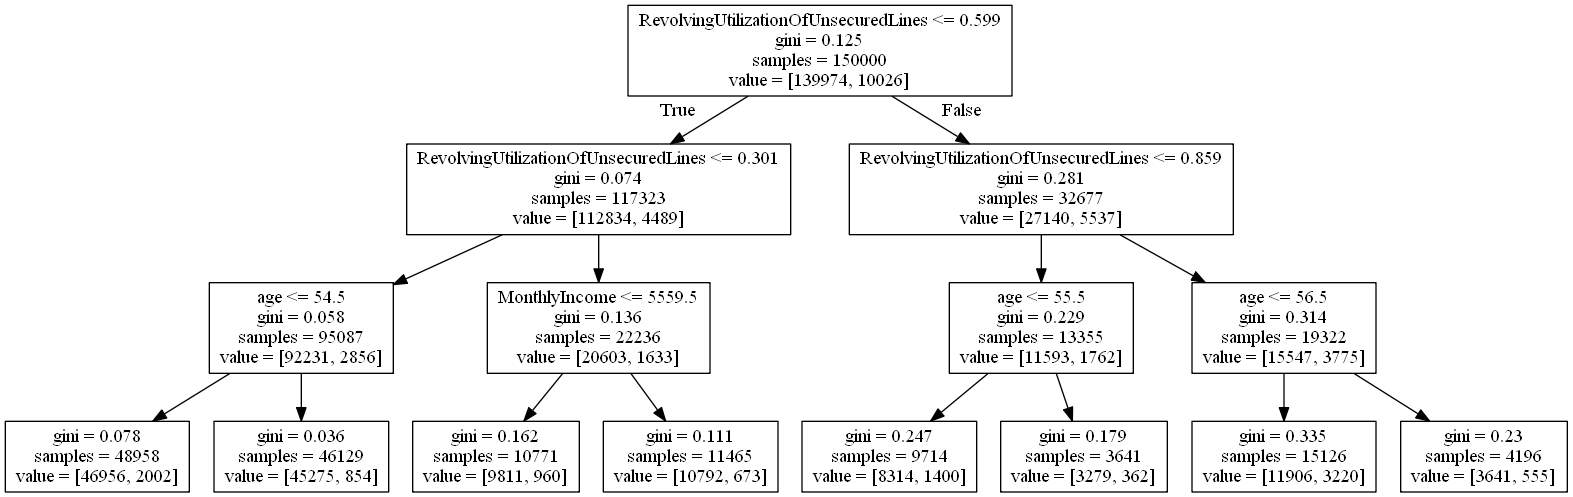

In [61]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydotplus

dot_data = export_graphviz(dt,out_file=None,feature_names=X.columns)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

# Model building - statistics

In [62]:
df1 = df.drop(columns=['mi_cat','ruul_cat'])

In [63]:
import statsmodels

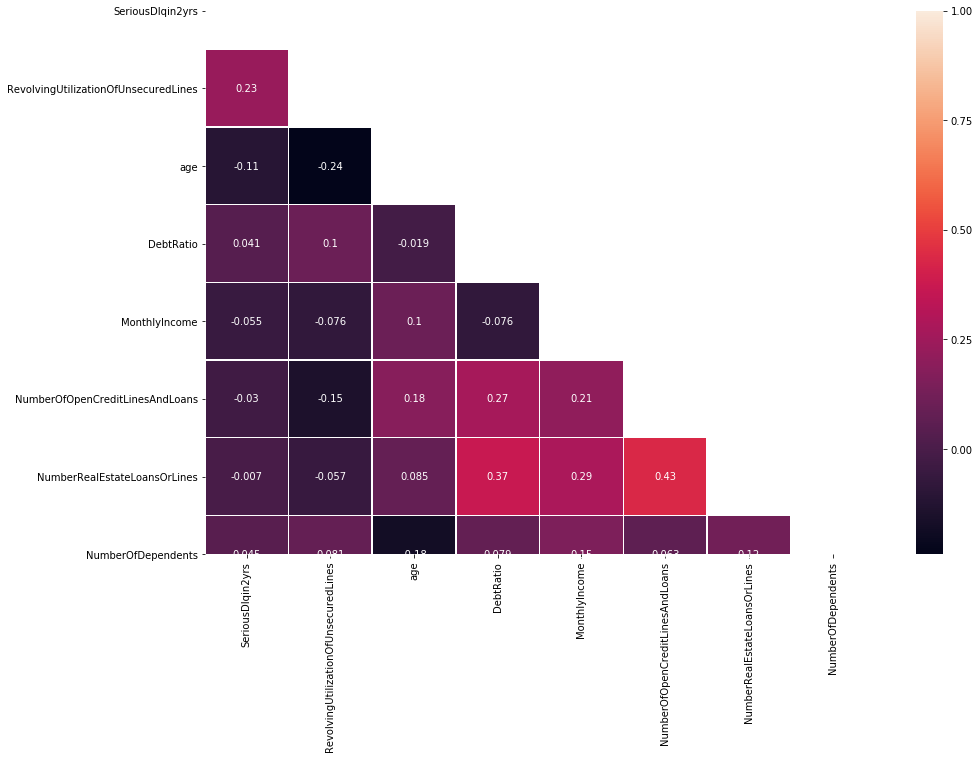

In [64]:
plt.figure(figsize=(15,10))
corr = df1.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(corr, mask=mask, linewidth=0.5, annot=True)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


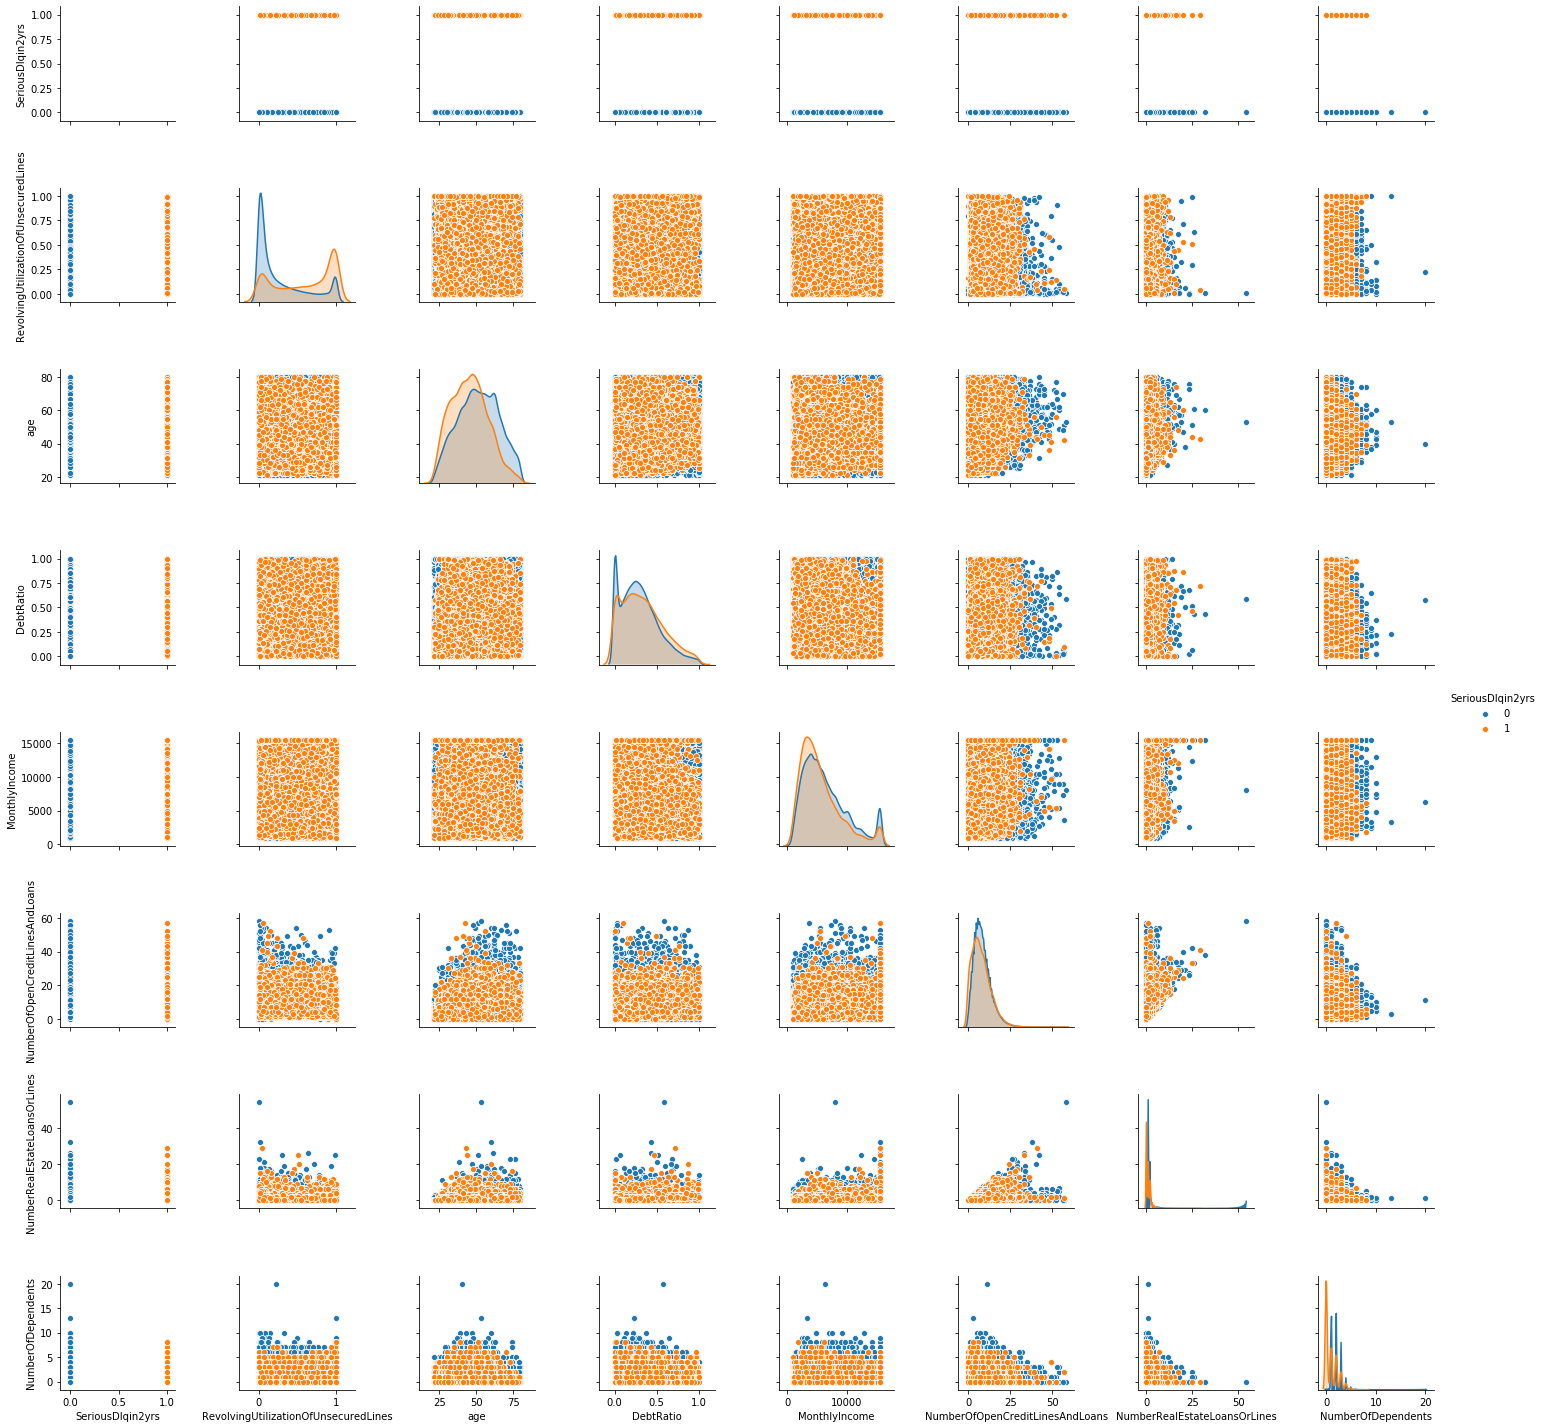

In [69]:
sns.pairplot(df1,hue='SeriousDlqin2yrs')

In [74]:
import statsmodels.api as sm
logit = sm.Logit(y,X).fit()

logit.summary()


Optimization terminated successfully.
         Current function value: 0.228733
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       SeriousDlqin2yrs   No. Observations:               150000
Model:                          Logit   Df Residuals:                   149993
Method:                           MLE   Df Model:                            6
Date:                Wed, 08 Jan 2020   Pseudo R-squ.:                 0.06787
Time:                        10:52:09   Log-Likelihood:                -34310.
converged:                       True   LL-Null:                       -36808.
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
RevolvingUtilizationOfUnsecuredLines     1.4361      0.026     55.956      0.000       1.386       1.486
age                                     -0.0563      0.001    -90.513      0.000      -0.057      -0.055
DebtRatio                               -0.3212      0.049     -6.610      0.000      -0.416      -0.226
MonthlyIncome                           -0.0001   3.52e-06    -29.675      0.000      -0.000   -9.76e-05
NumberOfOpenCreditLinesAndLoans          0.0031      0.003      1.204      0.228      -0.002       0.008
NumberRealEstateLoansOrLines             0.1550      0.010     15.355      0.000       0.135       0.175
NumberOfDependents                       0.0324      0.009      3.613      0.000       0.015       0.050
========================================================================================================
"""

In [75]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
pd.DataFrame({'vif':vif},index=X.columns)

,vif
RevolvingUtilizationOfUnsecuredLines,1.723949
age,6.055879
DebtRatio,3.364870
MonthlyIncome,4.453951
NumberOfOpenCreditLinesAndLoans,4.846921
NumberRealEstateLoansOrLines,2.627747
NumberOfDependents,1.522160


In [76]:
y = df['SeriousDlqin2yrs']
X = df.drop(columns=['SeriousDlqin2yrs','mi_cat','ruul_cat'])
X = X.assign(const=1)

In [77]:
import statsmodels.api as sm
logit = sm.Logit(y,X).fit()

logit.summary()


Optimization terminated successfully.
         Current function value: 0.218678
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       SeriousDlqin2yrs   No. Observations:               150000
Model:                          Logit   Df Residuals:                   149992
Method:                           MLE   Df Model:                            7
Date:                Wed, 08 Jan 2020   Pseudo R-squ.:                  0.1088
Time:                        10:58:56   Log-Likelihood:                -32802.
converged:                       True   LL-Null:                       -36808.
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
RevolvingUtilizationOfUnsecuredLines     2.2049      0.031     72.104      0.000       2.145       2.265
age                                     -0.0200      0.001    -22.703      0.000      -0.022      -0.018
DebtRatio                                0.2202      0.050      4.368      0.000       0.121       0.319
MonthlyIncome                        -5.208e-05    3.5e-06    -14.892      0.000   -5.89e-05   -4.52e-05
NumberOfOpenCreditLinesAndLoans          0.0226      0.002      9.289      0.000       0.018       0.027
NumberRealEstateLoansOrLines             0.0580      0.010      5.530      0.000       0.037       0.079
NumberOfDependents                       0.0860      0.009      9.552      0.000       0.068       0.104
const                                   -2.6993      0.052    -52.350      0.000      -2.800      -2.598
========================================================================================================
"""

In [78]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
pd.DataFrame({'vif':vif},index=X.columns)

,vif
RevolvingUtilizationOfUnsecuredLines,1.098568
age,1.132475
DebtRatio,1.278075
MonthlyIncome,1.186726
NumberOfOpenCreditLinesAndLoans,1.332094
NumberRealEstateLoansOrLines,1.470203
NumberOfDependents,1.082617
const,23.868246


In [79]:
#THIS VIF is the correct VIF, as nowe we have included Constant

In [80]:
np.exp(logit.params)

RevolvingUtilizationOfUnsecuredLines    9.069594
age                                     0.980240
DebtRatio                               1.246357
MonthlyIncome                           0.999948
NumberOfOpenCreditLinesAndLoans         1.022867
NumberRealEstateLoansOrLines            1.059728
NumberOfDependents                      1.089813
const                                   0.067251
dtype: float64

In [81]:
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents,mi_cat,ruul_cat
0,1,0.766127,45.0,0.802982,9120.0,13,6,2.0,4,4
1,0,0.957151,40.0,0.121876,2600.0,4,0,1.0,1,4
2,0,0.658180,38.0,0.085113,3042.0,2,0,0.0,1,4
3,0,0.233810,30.0,0.036050,3300.0,5,0,0.0,1,3
4,0,0.907239,49.0,0.024926,15500.0,7,1,0.0,4,4


In [83]:
X['MonthlyIncome']  = X['MonthlyIncome']/1000

In [84]:
X['DebtRatio'] = X['DebtRatio']*100

In [85]:
import statsmodels.api as sm
logit = sm.Logit(y,X).fit()

logit.summary()


Optimization terminated successfully.
         Current function value: 0.218678
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       SeriousDlqin2yrs   No. Observations:               150000
Model:                          Logit   Df Residuals:                   149992
Method:                           MLE   Df Model:                            7
Date:                Wed, 08 Jan 2020   Pseudo R-squ.:                  0.1088
Time:                        11:25:13   Log-Likelihood:                -32802.
converged:                       True   LL-Null:                       -36808.
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
RevolvingUtilizationOfUnsecuredLines     2.2049      0.031     72.104      0.000       2.145       2.265
age                                     -0.0200      0.001    -22.703      0.000      -0.022      -0.018
DebtRatio                                0.0022      0.001      4.368      0.000       0.001       0.003
MonthlyIncome                           -0.0521      0.003    -14.892      0.000      -0.059      -0.045
NumberOfOpenCreditLinesAndLoans          0.0226      0.002      9.289      0.000       0.018       0.027
NumberRealEstateLoansOrLines             0.0580      0.010      5.530      0.000       0.037       0.079
NumberOfDependents                       0.0860      0.009      9.552      0.000       0.068       0.104
const                                   -2.6993      0.052    -52.350      0.000      -2.800      -2.598
========================================================================================================
"""

In [89]:
np.exp(logit.params)

RevolvingUtilizationOfUnsecuredLines   -8.069594
age                                     0.019760
DebtRatio                              -0.002205
MonthlyIncome                           0.050743
NumberOfOpenCreditLinesAndLoans        -0.022867
NumberRealEstateLoansOrLines           -0.059728
NumberOfDependents                     -0.089813
const                                   0.932749
dtype: float64

In [90]:
1 - np.exp(logit.params)

RevolvingUtilizationOfUnsecuredLines   -8.069594
age                                     0.019760
DebtRatio                              -0.002205
MonthlyIncome                           0.050743
NumberOfOpenCreditLinesAndLoans        -0.022867
NumberRealEstateLoansOrLines           -0.059728
NumberOfDependents                     -0.089813
const                                   0.932749
dtype: float64

In [111]:
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix,roc_curve

In [95]:
y_prob = logit.predict(X)

In [97]:
y_pred = y_prob.apply(lambda x: 0 if x<0.5 else 1)

In [99]:
y_pred.value_counts()

0    149998
1         2
dtype: int64

In [100]:
confusion_matrix(y,y_pred)

array([[139972,      2],
       [ 10026,      0]], dtype=int64)

In [101]:
y_prob = logit.predict(X)
y_pred = y_prob.apply(lambda x:0 if x<0.3 else 1)

In [102]:
y_pred.value_counts()

0    149612
1       388
dtype: int64

In [103]:
confusion_matrix(y,y_pred)

array([[139694,    280],
       [  9918,    108]], dtype=int64)

In [104]:
y_prob = logit.predict(X)

In [105]:
y_pred = y_prob.apply(lambda x: 0 if x<0.5 else 1)

In [106]:
y_pred.value_counts()

0    149998
1         2
dtype: int64

In [107]:
confusion_matrix(y,y_pred)

array([[139972,      2],
       [ 10026,      0]], dtype=int64)

In [108]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97    139974
           1       0.00      0.00      0.00     10026

    accuracy                           0.93    150000
   macro avg       0.47      0.50      0.48    150000
weighted avg       0.87      0.93      0.90    150000



In [109]:
roc_auc_score(y,y_prob)

0.7540753689342512

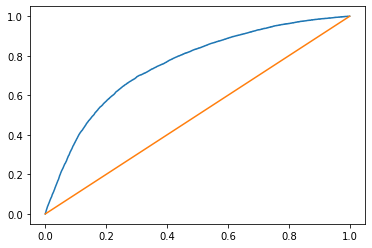

In [116]:
fpr,tpr,thresh = roc_curve(y,y_prob)

plt.plot(fpr,tpr)
plt.plot(fpr,fpr)
plt.show()

In [117]:
thresh[0] = thresh[0] - 1

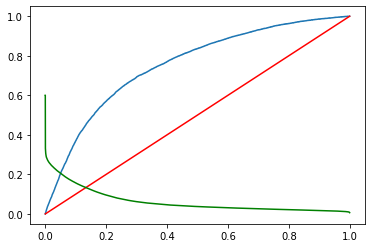

In [118]:
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'-r')
plt.plot(fpr,thresh,'-g')
plt.show()

In [137]:
y_prob = logit.predict(X)

In [138]:
y_pred = y_prob.apply(lambda x: 0 if x<0.1 else 1)

In [139]:
y_pred.value_counts()

0    117791
1     32209
dtype: int64

In [140]:
confusion_matrix(y,y_pred)

array([[113337,  26637],
       [  4454,   5572]], dtype=int64)

In [141]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.81      0.88    139974
           1       0.17      0.56      0.26     10026

    accuracy                           0.79    150000
   macro avg       0.57      0.68      0.57    150000
weighted avg       0.91      0.79      0.84    150000



In [142]:
roc_auc_score(y,y_prob)

0.7540753689342512

In [143]:
thresh[0] = thresh[0] - 1
diff = tpr-fpr

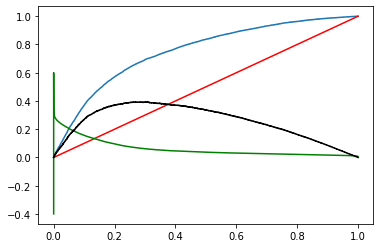

In [151]:
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'-r')
plt.plot(fpr,thresh,'-g')
plt.plot(fpr,diff,'-k')
plt.show()

In [145]:
y_prob = logit.predict(X)

In [146]:
y_pred = y_prob.apply(lambda x: 0 if x<0.1 else 1)

In [147]:
y_pred.value_counts()

0    117791
1     32209
dtype: int64

In [148]:
confusion_matrix(y,y_pred)

array([[113337,  26637],
       [  4454,   5572]], dtype=int64)

In [149]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.81      0.88    139974
           1       0.17      0.56      0.26     10026

    accuracy                           0.79    150000
   macro avg       0.57      0.68      0.57    150000
weighted avg       0.91      0.79      0.84    150000



In [150]:
roc_auc_score(y,y_prob)

0.7540753689342512

# Machine Learning-Classifier

In [152]:
from sklearn.model_selection import train_test_split

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [154]:
from sklearn.ensemble import RandomForestClassifier

In [163]:
from sklearn.metrics import accuracy_score
rfc = RandomForestClassifier(n_estimators=10,random_state=1)
rfc.fit(X_train,y_train)
y_train_prob = rfc.predict_proba(X_train)[:,1]
y_test_prob = rfc.predict_proba(X_test)[:,1]

y_train_pred = rfc.predict(X_train)
y_test_pred = rfc.predict(X_test)

print('Accuracy_score of train:',accuracy_score(y_train,y_train_pred))
print('Accuracy_score of test:',accuracy_score(y_test,y_test_pred))

print('AUC of train:',roc_auc_score(y_train,y_train_prob))
print('AUC of test:',roc_auc_score(y_test,y_test_prob))

Accuracy_score of train: 0.987
Accuracy_score of test: 0.9301555555555555
AUC of train: 0.999577453434209
AUC of test: 0.6599604446221206


# Hyperparameter tuning

In [164]:
##Hyperparameter tuning:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

rfr = RandomForestClassifier(random_state=1)
param_dist = {'n_estimators':sp_randint(5,100),'max_depth':sp_randint(2,40),
              'min_samples_split':sp_randint(2,20),'min_samples_leaf':sp_randint(2,10)}
rand_search = RandomizedSearchCV(rfr,param_distributions=param_dist,cv=3,random_state=1)

rand_search.fit(X,y)

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [165]:
print(rand_search.best_params_)

{'max_depth': 11, 'min_samples_leaf': 5, 'min_samples_split': 7, 'n_estimators': 84}


In [166]:
from sklearn.metrics import accuracy_score
rfc = RandomForestClassifier(**rand_search.best_params_)
rfc.fit(X_train,y_train)
y_train_prob = rfc.predict_proba(X_train)[:,1]
y_test_prob = rfc.predict_proba(X_test)[:,1]

y_train_pred = rfc.predict(X_train)
y_test_pred = rfc.predict(X_test)

print('Accuracy_score of train:',accuracy_score(y_train,y_train_pred))
print('Accuracy_score of test:',accuracy_score(y_test,y_test_pred))

print('AUC of train:',roc_auc_score(y_train,y_train_prob))
print('AUC of test:',roc_auc_score(y_test,y_test_prob))

Accuracy_score of train: 0.9330190476190476
Accuracy_score of test: 0.9336
AUC of train: 0.8478422373577372
AUC of test: 0.7673537066161117


# Simulation to Estimate optimal cutoff: 

In [168]:
##Simulation to Estimate optimal cutoff: in order to get the right cutoff(so making conf matrix for each cutoff)
##Assumpotions are conf matrix gain/loss:
#                1000    -1000
#                10000    0
model_gain = []
thresholds = []

y_prob = pd.DataFrame(y_test_prob)

max_p = y_prob.max()
for i in np.linspace(0,max_p,100):
    y_pred = y_prob[0].apply(lambda x: 1 if x>i else 0)
    conf = confusion_matrix(y_test,y_pred)
    tot_benefit = conf[0][0]*1000 + conf[0][1]*-1000
    tot_cost = conf[1][0]*10000
    net_gain = tot_benefit - tot_cost
    model_gain.append(net_gain)
    thresholds.append(i)
print('MaxNetGain:',max(model_gain))

MaxNetGain: 15136000


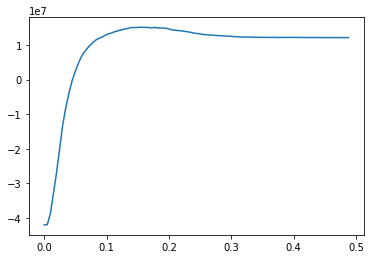

In [175]:
plt.plot(thresholds,model_gain)

In [178]:
##Simulation to Estimate optimal cutoff: in order to get the right cutoff(so making conf matrix for each cutoff)
##Assumpotions are conf matrix gain/loss:
#                1000    -1000
#                15000    0
model_gain = []
thresholds = []

y_prob = pd.DataFrame(y_test_prob)

max_p = y_prob.max()
for i in np.linspace(0,max_p,100):
    y_pred = y_prob[0].apply(lambda x: 1 if x>i else 0)
    conf = confusion_matrix(y_test,y_pred)
    tot_benefit = conf[0][0]*1000 + conf[0][1]*-1000
    tot_cost = conf[1][0]*15000  ##Increasing cost
    net_gain = tot_benefit - tot_cost
    model_gain.append(net_gain)
    thresholds.append(i)
print('MaxNetGain:',max(model_gain))

MaxNetGain: 6942000


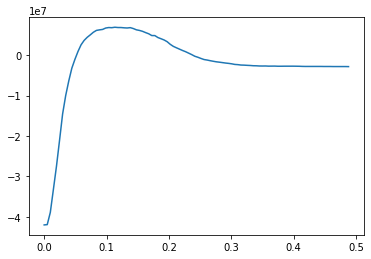

In [179]:
plt.plot(thresholds,model_gain)

In [ ]:
##This model is based on the gain/loss functions in banking environment

In [180]:
y_prob

,0
0,0.008800
1,0.014729
2,0.051336
3,0.012434
4,0.019094
...,...
44995,0.052091
44996,0.054787
44997,0.167259
44998,0.065016


In [181]:
max_p

0    0.488089
dtype: float64

In [184]:
optimal_idx = np.argmax(model_gain)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

array([0.11339452])

In [183]:
optimal_idx

23

# Scoring Loan Applications:

In [309]:
dfs = pd.read_csv('gsmc_to_score.csv')

In [310]:
dfs.head()

,Unnamed: 0,ID,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents
0,0,38250,0.689749,38,0.650818,4584.0,13,2,0.0
1,1,13403,1.043621,32,0.025321,5765.0,3,0,1.0
2,2,8615,0.456954,48,0.580222,6400.0,7,2,1.0
3,3,21200,0.368844,52,0.078662,9775.0,8,0,0.0
4,4,100806,0.505278,62,0.414859,6500.0,23,0,2.0


In [311]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
Unnamed: 0                              200 non-null int64
ID                                      200 non-null int64
RevolvingUtilizationOfUnsecuredLines    200 non-null float64
age                                     200 non-null int64
DebtRatio                               200 non-null float64
MonthlyIncome                           163 non-null float64
NumberOfOpenCreditLinesAndLoans         200 non-null int64
NumberRealEstateLoansOrLines            200 non-null int64
NumberOfDependents                      198 non-null float64
dtypes: float64(4), int64(5)
memory usage: 14.2 KB


In [312]:
id = dfs[['ID']]
dfs = dfs.drop(columns=['Unnamed: 0','ID'])

In [313]:
df = dfs

In [314]:
df.loc[df['MonthlyIncome']>15500,'MonthlyIncome'] = 15500

#For handling outliers at max level, we have capped outliers at q3+1.5iqr

In [315]:
df.loc[df['MonthlyIncome']<1000,'MonthlyIncome'] = np.nan

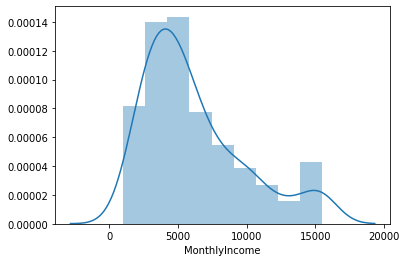

In [316]:
sns.distplot(df['MonthlyIncome'].dropna())

In [317]:
df['MonthlyIncome'].fillna(df['MonthlyIncome'].mean())

0      4584.0
1      5765.0
2      6400.0
3      9775.0
4      6500.0
        ...  
195    3200.0
196    6605.0
197    3200.0
198    2274.0
199    5667.0
Name: MonthlyIncome, Length: 200, dtype: float64

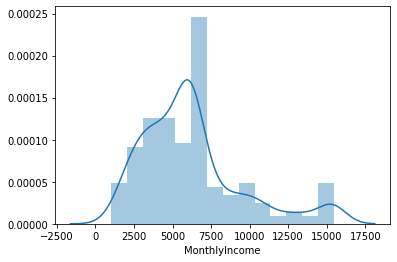

In [318]:
sns.distplot(df['MonthlyIncome'].fillna(df['MonthlyIncome'].mean()))

In [319]:
##Not the correct approach

In [320]:
df['MonthlyIncome'].fillna(method='ffill',inplace=True)

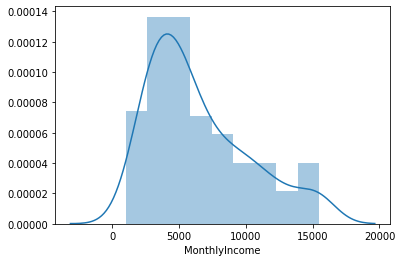

In [321]:
sns.distplot(df['MonthlyIncome'])

In [322]:
#Maintains distribution

In [323]:
df['RevolvingUtilizationOfUnsecuredLines'].describe()  ##monthly limit of credit(what proportion is being used)

count    200.000000
mean       0.402545
std        0.390234
min        0.000000
25%        0.057354
50%        0.253041
75%        0.708836
max        1.744511
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

In [324]:
df.loc[df['RevolvingUtilizationOfUnsecuredLines']>1,'RevolvingUtilizationOfUnsecuredLines'] = np.nan

In [325]:
df['RevolvingUtilizationOfUnsecuredLines'].fillna(method='ffill',inplace=True)

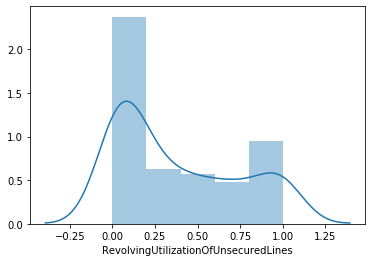

In [326]:
sns.distplot(df['RevolvingUtilizationOfUnsecuredLines'])

In [327]:
df['age'].describe()

count    200.000000
mean      50.055000
std       14.932073
min       21.000000
25%       40.000000
50%       49.000000
75%       60.250000
max       92.000000
Name: age, dtype: float64

In [328]:
df.loc[((df['age']>80)|(df['age']<18)),'age'] = np.nan

In [329]:
df['age'].isna().sum()

6

In [330]:
df['age'].fillna(method='ffill',inplace=True)

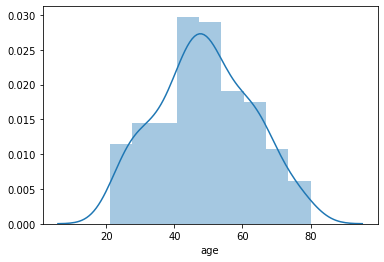

In [331]:
sns.distplot(df['age'])

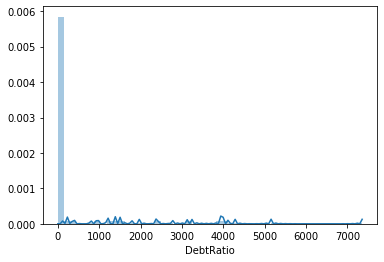

In [332]:
sns.distplot(df['DebtRatio'])

In [333]:
df.loc[df['DebtRatio']>1,'DebtRatio'] = np.nan

In [334]:
df['DebtRatio'].fillna(method='ffill',inplace=True)

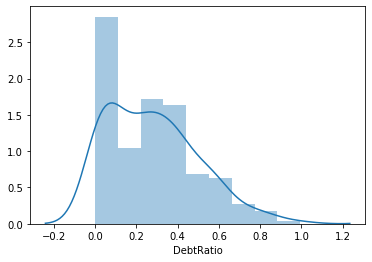

In [335]:
sns.distplot(df['DebtRatio'])

In [336]:
df['NumberOfDependents'].describe()

count    198.000000
mean       0.797980
std        1.174862
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        6.000000
Name: NumberOfDependents, dtype: float64

In [337]:
df['NumberOfDependents'].isna().sum()

2

In [338]:
df['NumberOfDependents'].fillna(method='ffill',inplace=True)

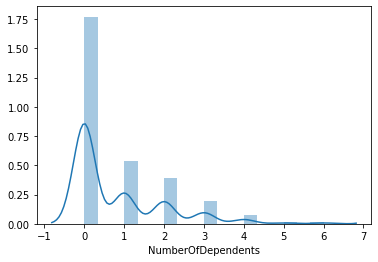

In [339]:
sns.distplot(df['NumberOfDependents'])

In [340]:
dfs = dfs.assign(const=1)
y_prob_score = rfc.predict_proba(dfs)[:,1]

In [341]:
y_prob_score

array([0.4       , 0.3       , 0.1       , 0.3       , 0.1       ,
       0.2       , 0.3       , 0.6       , 0.3       , 0.3       ,
       0.1       , 0.3       , 0.2       , 0.6       , 0.3       ,
       0.        , 0.        , 0.1       , 0.4       , 0.2       ,
       0.4       , 0.1       , 0.        , 0.        , 0.3       ,
       0.        , 0.2       , 0.        , 0.2       , 0.1       ,
       0.1       , 0.4       , 0.7       , 0.3       , 0.3       ,
       0.7       , 0.        , 0.1       , 0.1       , 0.1       ,
       0.        , 0.        , 0.3       , 0.1       , 0.1       ,
       0.9       , 0.1       , 0.        , 0.1       , 0.3       ,
       0.        , 0.        , 0.        , 0.5       , 0.3       ,
       0.3       , 0.3       , 0.        , 0.1       , 0.        ,
       0.1       , 0.        , 0.        , 0.1       , 0.        ,
       0.1       , 0.        , 0.        , 0.2       , 0.        ,
       0.2       , 0.1       , 0.        , 0.1       , 0.     

In [342]:
id.head()

,ID
0,38250
1,13403
2,8615
3,21200
4,100806


In [343]:
id['prob'] = y_prob_score

In [344]:
id

,ID,prob
0,38250,0.4
1,13403,0.3
2,8615,0.1
3,21200,0.3
4,100806,0.1
...,...,...
195,97314,0.1
196,33387,0.0
197,97712,0.1
198,114608,0.3


In [345]:
id['Approve_Reject'] = id['prob'].apply(lambda x: 'approved' if x<optimal_threshold else 'reject')

In [346]:
id

,ID,prob,Approve_Reject
0,38250,0.4,reject
1,13403,0.3,reject
2,8615,0.1,approved
3,21200,0.3,reject
4,100806,0.1,approved
...,...,...,...
195,97314,0.1,approved
196,33387,0.0,approved
197,97712,0.1,approved
198,114608,0.3,reject


# Feature engineering to improve model result:

In [484]:
dfn = dfn1.copy()

In [485]:
dfn['MIbyNCL'] = dfn['MonthlyIncome'] / (dfn['NumberOfOpenCreditLinesAndLoans'] + 1)

In [486]:
dfn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
SeriousDlqin2yrs                        150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null float64
DebtRatio                               150000 non-null float64
MonthlyIncome                           150000 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
NumberOfDependents                      150000 non-null float64
mi_cat                                  150000 non-null int64
ruul_cat                                150000 non-null int64
MIbyNCL                                 150000 non-null float64
dtypes: float64(6), int64(5)
memory usage: 12.6 MB


In [487]:
dfn[['ruul_cat','mi_cat']] = dfn[['ruul_cat','mi_cat']].astype(object)

In [488]:
dfn = pd.get_dummies(dfn,columns=['ruul_cat','mi_cat'],drop_first=True)

In [489]:
dfn.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents,MIbyNCL,ruul_cat_2,ruul_cat_3,ruul_cat_4,mi_cat_2,mi_cat_3,mi_cat_4
0,1,0.766127,45.0,0.802982,9120.0,13,6,2.0,651.428571,0,0,1,0,0,1
1,0,0.957151,40.0,0.121876,2600.0,4,0,1.0,520.000000,0,0,1,0,0,0
2,0,0.658180,38.0,0.085113,3042.0,2,0,0.0,1014.000000,0,0,1,0,0,0
3,0,0.233810,30.0,0.036050,3300.0,5,0,0.0,550.000000,0,1,0,0,0,0
4,0,0.907239,49.0,0.024926,15500.0,7,1,0.0,1937.500000,0,0,1,0,0,1


In [490]:
dfn.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans',
       'NumberRealEstateLoansOrLines', 'NumberOfDependents', 'MIbyNCL',
       'ruul_cat_2', 'ruul_cat_3', 'ruul_cat_4', 'mi_cat_2', 'mi_cat_3',
       'mi_cat_4'],
      dtype='object')

In [491]:
dfn = dfn.drop(columns=['RevolvingUtilizationOfUnsecuredLines','MonthlyIncome'])

In [492]:
dfn.head()

,SeriousDlqin2yrs,age,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents,MIbyNCL,ruul_cat_2,ruul_cat_3,ruul_cat_4,mi_cat_2,mi_cat_3,mi_cat_4
0,1,45.0,0.802982,13,6,2.0,651.428571,0,0,1,0,0,1
1,0,40.0,0.121876,4,0,1.0,520.000000,0,0,1,0,0,0
2,0,38.0,0.085113,2,0,0.0,1014.000000,0,0,1,0,0,0
3,0,30.0,0.036050,5,0,0.0,550.000000,0,1,0,0,0,0
4,0,49.0,0.024926,7,1,0.0,1937.500000,0,0,1,0,0,1


In [493]:
dfn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 13 columns):
SeriousDlqin2yrs                   150000 non-null int64
age                                150000 non-null float64
DebtRatio                          150000 non-null float64
NumberOfOpenCreditLinesAndLoans    150000 non-null int64
NumberRealEstateLoansOrLines       150000 non-null int64
NumberOfDependents                 150000 non-null float64
MIbyNCL                            150000 non-null float64
ruul_cat_2                         150000 non-null uint8
ruul_cat_3                         150000 non-null uint8
ruul_cat_4                         150000 non-null uint8
mi_cat_2                           150000 non-null uint8
mi_cat_3                           150000 non-null uint8
mi_cat_4                           150000 non-null uint8
dtypes: float64(4), int64(3), uint8(6)
memory usage: 8.9 MB


In [494]:
y = dfn['SeriousDlqin2yrs']
X = dfn.drop(columns='SeriousDlqin2yrs')

In [495]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [496]:
from sklearn.ensemble import RandomForestClassifier

In [497]:
X.isnull().sum()

age                                0
DebtRatio                          0
NumberOfOpenCreditLinesAndLoans    0
NumberRealEstateLoansOrLines       0
NumberOfDependents                 0
MIbyNCL                            0
ruul_cat_2                         0
ruul_cat_3                         0
ruul_cat_4                         0
mi_cat_2                           0
mi_cat_3                           0
mi_cat_4                           0
dtype: int64

In [498]:
from sklearn.metrics import accuracy_score
rfc = RandomForestClassifier(n_estimators=10,random_state=1)
rfc.fit(X_train,y_train)
y_train_prob = rfc.predict_proba(X_train)[:,1]
y_test_prob = rfc.predict_proba(X_test)[:,1]

y_train_pred = rfc.predict(X_train)
y_test_pred = rfc.predict(X_test)

print('Accuracy_score of train:',accuracy_score(y_train,y_train_pred))
print('Accuracy_score of test:',accuracy_score(y_test,y_test_pred))

print('AUC of train:',roc_auc_score(y_train,y_train_prob))
print('AUC of test:',roc_auc_score(y_test,y_test_prob))

Accuracy_score of train: 0.9867142857142858
Accuracy_score of test: 0.9290222222222222
AUC of train: 0.9994659351676396
AUC of test: 0.644854338806239


# Hyperparameter tuning

In [499]:
##Hyperparameter tuning:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

rfr = RandomForestClassifier(random_state=1)
param_dist = {'n_estimators':sp_randint(5,100),'max_depth':sp_randint(2,40),
              'min_samples_split':sp_randint(2,20),'min_samples_leaf':sp_randint(2,10)}
rand_search = RandomizedSearchCV(rfr,param_distributions=param_dist,cv=3,random_state=1)

rand_search.fit(X,y)

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [500]:
print(rand_search.best_params_)

{'max_depth': 11, 'min_samples_leaf': 5, 'min_samples_split': 7, 'n_estimators': 84}


In [501]:
from sklearn.metrics import accuracy_score
rfc = RandomForestClassifier(**rand_search.best_params_)
rfc.fit(X_train,y_train)
y_train_prob = rfc.predict_proba(X_train)[:,1]
y_test_prob = rfc.predict_proba(X_test)[:,1]

y_train_pred = rfc.predict(X_train)
y_test_pred = rfc.predict(X_test)

print('Accuracy_score of train:',accuracy_score(y_train,y_train_pred))
print('Accuracy_score of test:',accuracy_score(y_test,y_test_pred))

print('AUC of train:',roc_auc_score(y_train,y_train_prob))
print('AUC of test:',roc_auc_score(y_test,y_test_prob))

Accuracy_score of train: 0.933047619047619
Accuracy_score of test: 0.9336222222222222
AUC of train: 0.8372402111149118
AUC of test: 0.7584788517744849
